## Imports

In [2]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.UCB_training.UCB_train import clean_daily
from neuralhydrology.UCB_training.UCB_train import combinedPlot
from neuralhydrology.evaluation.metrics import calculate_all_metrics

## Working directory

In [4]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("calpella"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all
Train Basin File Exists: True


## Standard daily LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [6]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [7]:
lstmNoPhysicsDaily.train()

2025-01-20 14:24:55,206: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142455\output.log initialized.
2025-01-20 14:24:55,208: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142455
2025-01-20 14:24:55,210: ### Run configurations for testing_run
2025-01-20 14:24:55,214: experiment_name: testing_run
2025-01-20 14:24:55,217: train_basin_file: calpella
2025-01-20 14:24:55,220: validation_basin_file: calpella
2025-01-20 14:24:55,223: test_basin_file: calpella
2025-01-20 14:24:55,227: train_start_date: 1994-10-01 00:00:00
2025-01-20 14:24:55,229: train_end_date: 2002-09-30 00:00:00
2025-01-20 14:24:55,233: validation_start_date: 2002-10-01 00:00:00
2025-01-20 14:24:55,236: validation_end_date: 2005-09-30 00:00:00
2025-01-20 14:24:55,238: test_start_date: 2005-10-01 00:00:00
2025-01-20 14:24:55,240: test_end_date: 2009-09-30 00:00:00
2025-01-20 14:24:55,244: device: cpu
2025-01-20 14:24:55,246:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]
2025-01-20 14:25:22,465: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142455\validation\model_epoch016\validation_metrics.csv
2025-01-20 14:25:22,468: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142455\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2001_142455')

Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

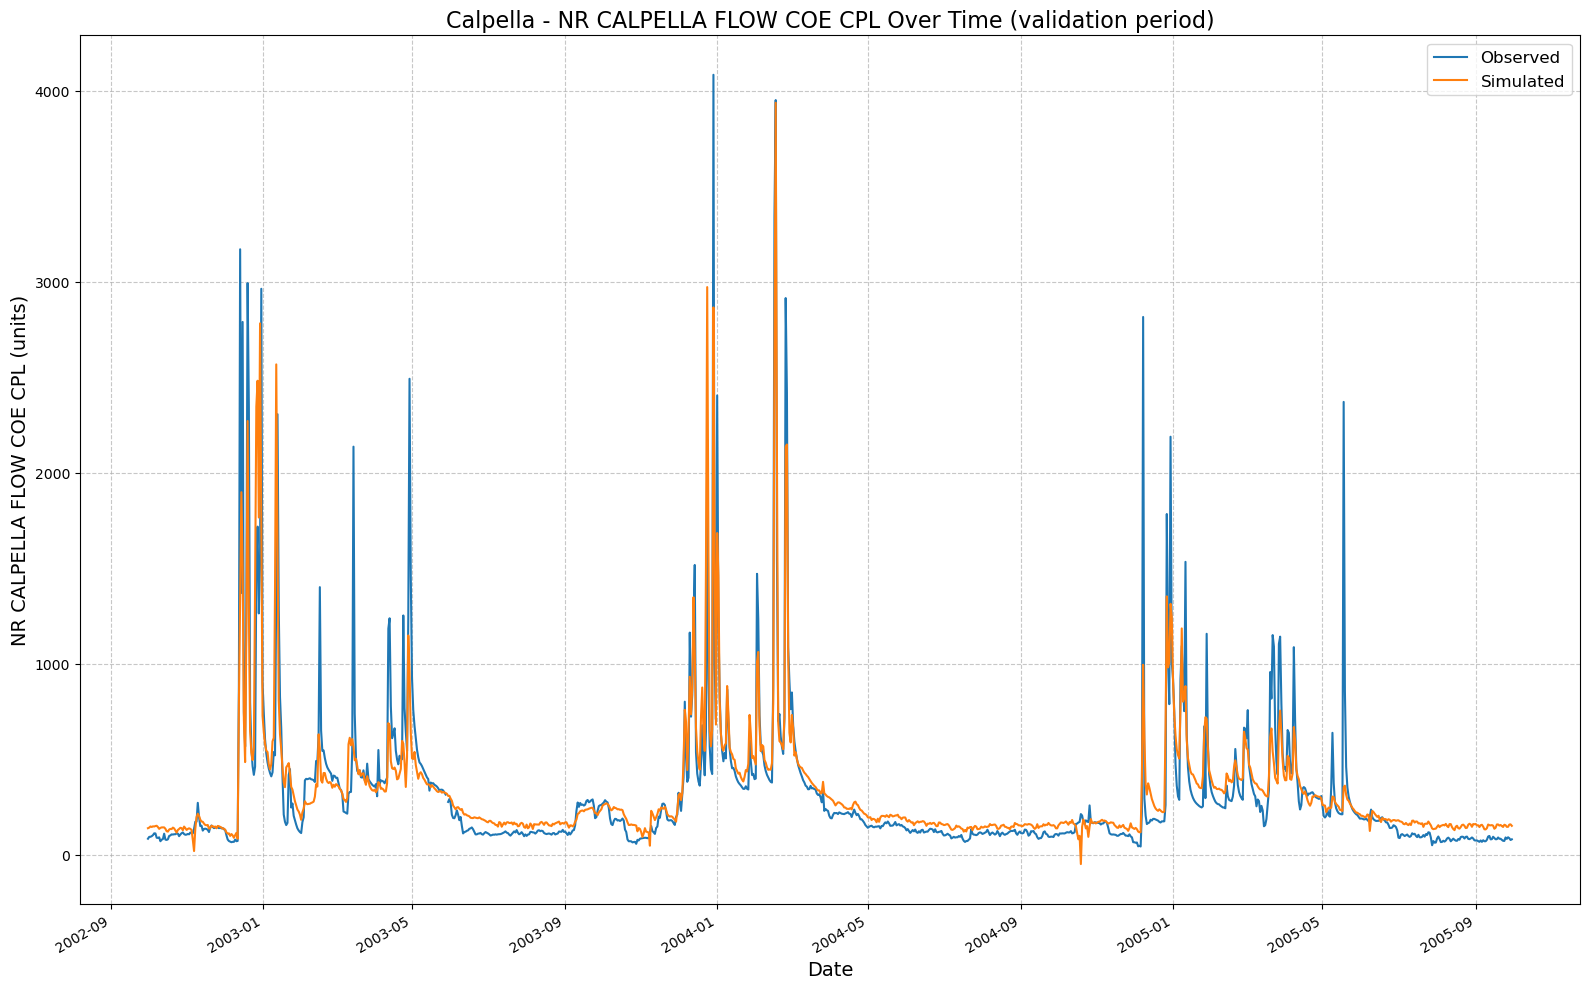

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142455\results_output_validation.csv


({'NSE': 0.7578212469816208,
  'MSE': 41488.18359375,
  'RMSE': 203.68648358138543,
  'KGE': 0.7772419500500333,
  'Alpha-NSE': 0.8219286377347167,
  'Beta-KGE': 1.0408791303634644,
  'Beta-NSE': 0.031274833863343614,
  'Pearson-r': 0.8725612482043825,
  'FHV': -15.596018731594086,
  'FMS': -23.281440007729895,
  'FLV': -2295.4380267442393,
  'Peak-Timing': 0.6,
  'Peak-MAPE': 59.77750301361085},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2001_142455/results_output_validation.csv'))

In [8]:
lstmNoPhysicsDaily.results()

## Physics-informed LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [10]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Calpella_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [11]:
lstmPhysicsDaily.train()

2025-01-20 14:25:23,406: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142523\output.log initialized.
2025-01-20 14:25:23,408: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142523
2025-01-20 14:25:23,409: ### Run configurations for testing_run
2025-01-20 14:25:23,411: experiment_name: testing_run
2025-01-20 14:25:23,412: train_basin_file: calpella
2025-01-20 14:25:23,414: validation_basin_file: calpella
2025-01-20 14:25:23,415: test_basin_file: calpella
2025-01-20 14:25:23,417: train_start_date: 1994-10-01 00:00:00
2025-01-20 14:25:23,419: train_end_date: 2002-09-30 00:00:00
2025-01-20 14:25:23,420: validation_start_date: 2002-10-01 00:00:00
2025-01-20 14:25:23,421: validation_end_date: 2005-09-30 00:00:00
2025-01-20 14:25:23,422: test_start_date: 2005-10-01 00:00:00
2025-01-20 14:25:23,423: test_end_date: 2009-09-30 00:00:00
2025-01-20 14:25:23,425: device: cpu
2025-01-20 14:25:23,426:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]
2025-01-20 14:25:44,561: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142523\validation\model_epoch016\validation_metrics.csv
2025-01-20 14:25:44,564: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142523\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2001_142523')

Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

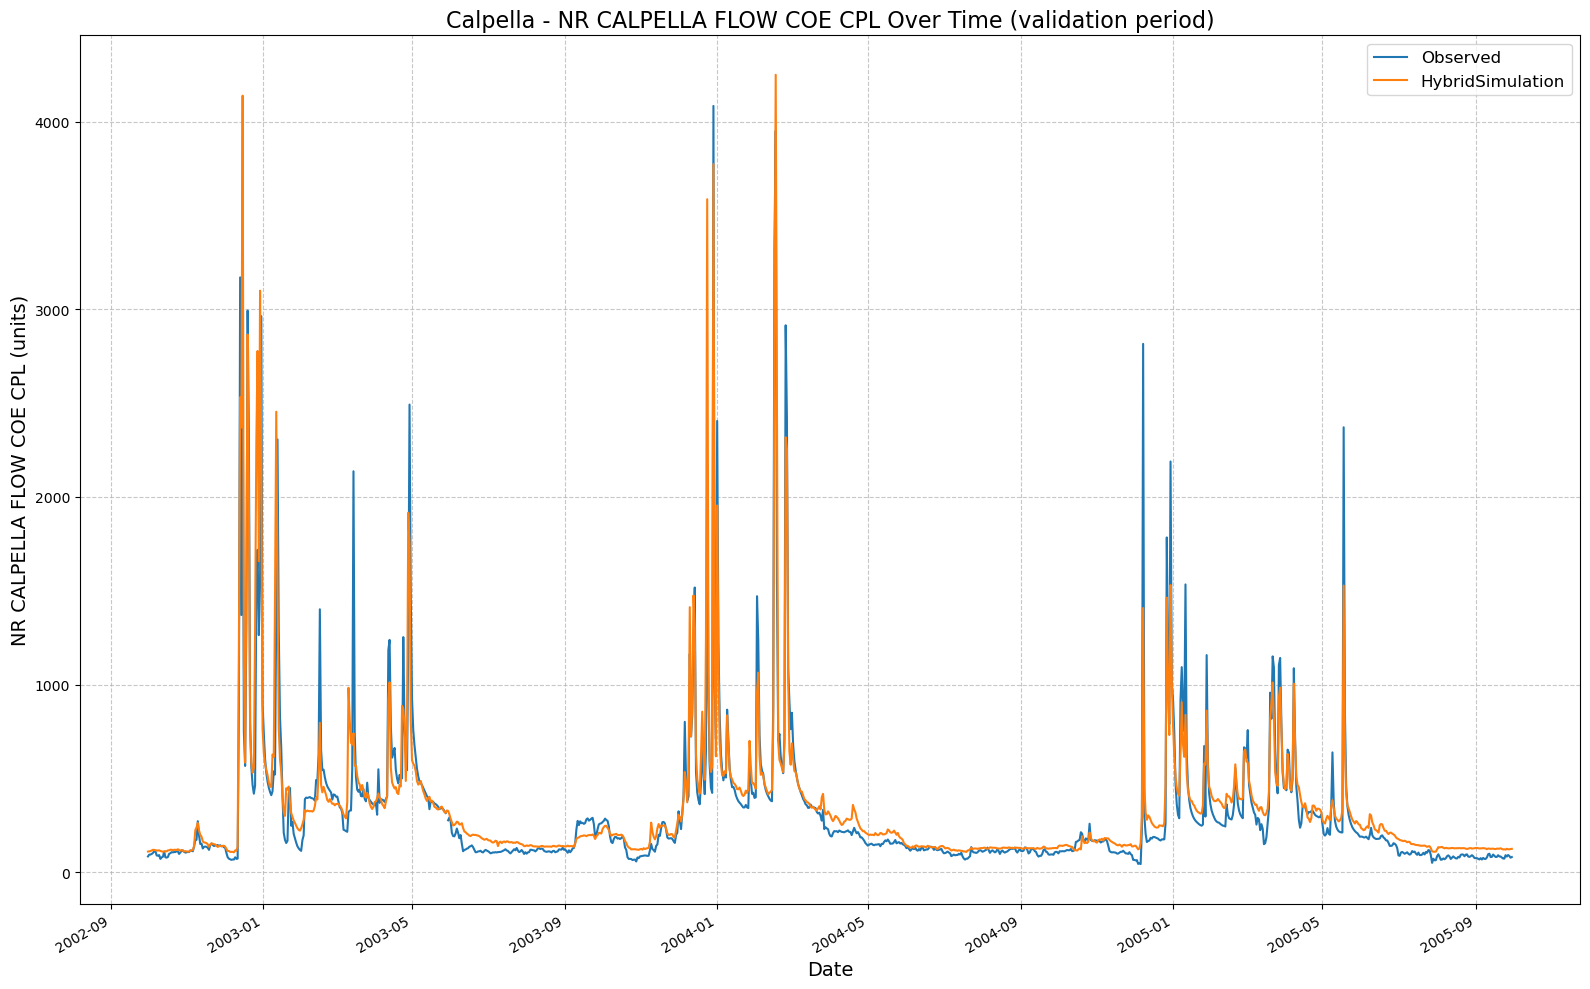

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142523\results_output_validation.csv


({'NSE': 0.8398010432720184,
  'MSE': 27444.04296875,
  'RMSE': 165.66243680674867,
  'KGE': 0.8860054824671455,
  'Alpha-NSE': 0.9759332813768421,
  'Beta-KGE': 1.0775879621505737,
  'Beta-NSE': 0.05935920982877215,
  'Pearson-r': 0.9200271845463526,
  'FHV': 0.9262194857001305,
  'FMS': -10.450330460124903,
  'FLV': 76.48087490354827,
  'Peak-Timing': 0.2,
  'Peak-MAPE': 28.640592098236084},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2001_142523/results_output_validation.csv'))

In [12]:
lstmPhysicsDaily.results()

## Retrain LSTM on entire train period using best hyperparameters, evaluate on test period

In [14]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [15]:
lstmNoPhysicsDailyExtended.train()

2025-01-20 14:25:45,420: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545\output.log initialized.
2025-01-20 14:25:45,421: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545
2025-01-20 14:25:45,423: ### Run configurations for testing_run
2025-01-20 14:25:45,426: experiment_name: testing_run
2025-01-20 14:25:45,428: train_basin_file: calpella
2025-01-20 14:25:45,430: validation_basin_file: calpella
2025-01-20 14:25:45,432: test_basin_file: calpella
2025-01-20 14:25:45,434: train_start_date: 1994-10-01 00:00:00
2025-01-20 14:25:45,435: train_end_date: 2005-09-30 00:00:00
2025-01-20 14:25:45,436: validation_start_date: 2002-10-01 00:00:00
2025-01-20 14:25:45,438: validation_end_date: 2005-09-30 00:00:00
2025-01-20 14:25:45,439: test_start_date: 2005-10-01 00:00:00
2025-01-20 14:25:45,440: test_end_date: 2009-09-30 00:00:00
2025-01-20 14:25:45,442: device: cpu
2025-01-20 14:25:45,443:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]
2025-01-20 14:26:37,589: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545\validation\model_epoch032\validation_metrics.csv
2025-01-20 14:26:37,592: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545\validation\model_epoch032\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2001_142545')

2025-01-20 14:26:37,646: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545\model_epoch032.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
2025-01-20 14:26:38,091: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545\test\model_epoch032\test_metrics.csv
2025-01-20 14:26:38,094: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545\test\model_epoch032\test_results.p
Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

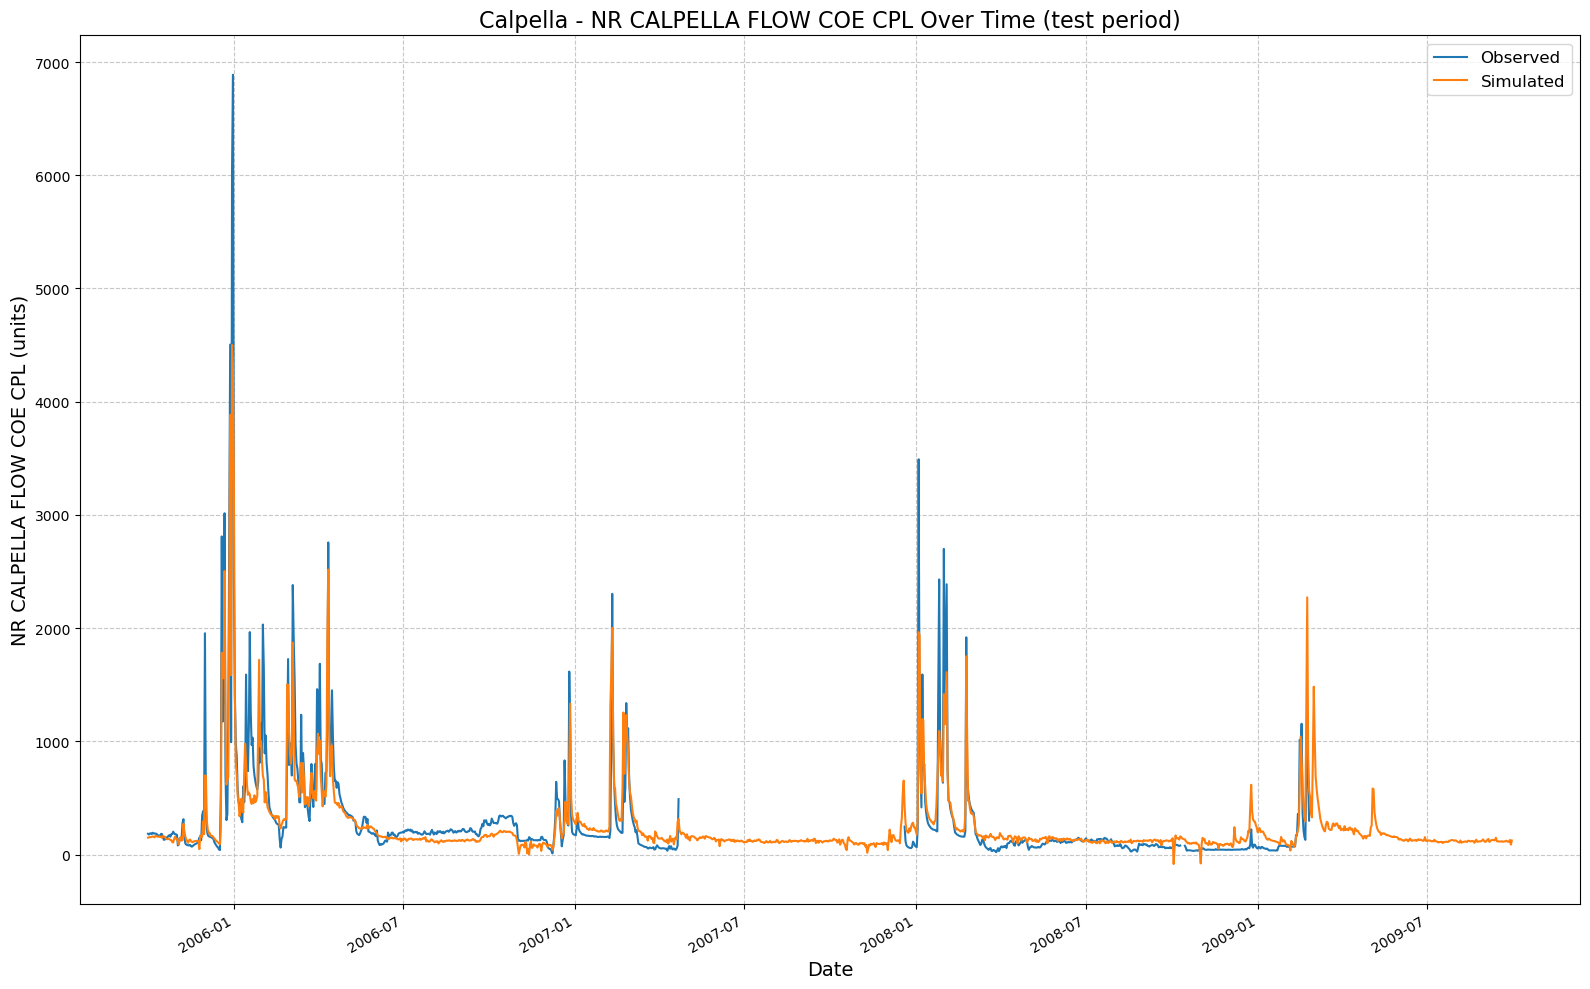

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142545\results_output_test.csv


In [16]:
lstm_result_metrics, lstm_result_path = lstmNoPhysicsDailyExtended.results('test')

In [17]:
lstm_result_metrics

{'NSE': 0.8153587132692337,
 'MSE': 47024.3984375,
 'RMSE': 216.8510973859713,
 'KGE': 0.7671332785865745,
 'Alpha-NSE': 0.7850635791226984,
 'Beta-KGE': 0.9837226271629333,
 'Beta-NSE': -0.009562160726856285,
 'Pearson-r': 0.9118847796585827,
 'FHV': -20.24422287940979,
 'FMS': -24.261627362292923,
 'FLV': -1012.8648771704327,
 'Peak-Timing': 0.5,
 'Peak-MAPE': 44.25943851470947}

## Retrain PI-LSTM on entire train period using best hyperparameters, evaluate on test period

In [19]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Calpella_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
#extend train period set to true
lstmPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [20]:
lstmPhysicsDailyExtended.train()

2025-01-20 14:26:38,952: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638\output.log initialized.
2025-01-20 14:26:38,954: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638
2025-01-20 14:26:38,956: ### Run configurations for testing_run
2025-01-20 14:26:38,957: experiment_name: testing_run
2025-01-20 14:26:38,959: train_basin_file: calpella
2025-01-20 14:26:38,961: validation_basin_file: calpella
2025-01-20 14:26:38,963: test_basin_file: calpella
2025-01-20 14:26:38,964: train_start_date: 1994-10-01 00:00:00
2025-01-20 14:26:38,966: train_end_date: 2005-09-30 00:00:00
2025-01-20 14:26:38,967: validation_start_date: 2002-10-01 00:00:00
2025-01-20 14:26:38,969: validation_end_date: 2005-09-30 00:00:00
2025-01-20 14:26:38,971: test_start_date: 2005-10-01 00:00:00
2025-01-20 14:26:38,972: test_end_date: 2009-09-30 00:00:00
2025-01-20 14:26:38,976: device: cpu
2025-01-20 14:26:38,978:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]
2025-01-20 14:27:51,548: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638\validation\model_epoch032\validation_metrics.csv
2025-01-20 14:27:51,551: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638\validation\model_epoch032\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_2001_142638')

2025-01-20 14:27:51,637: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638\model_epoch032.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]
2025-01-20 14:27:52,207: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638\test\model_epoch032\test_metrics.csv
2025-01-20 14:27:52,210: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638\test\model_epoch032\test_results.p
Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL
Observed_key: NR CALPELLA FLOW COE CPL_obs
Simulated_key: NR CALPELLA FLOW COE CPL_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

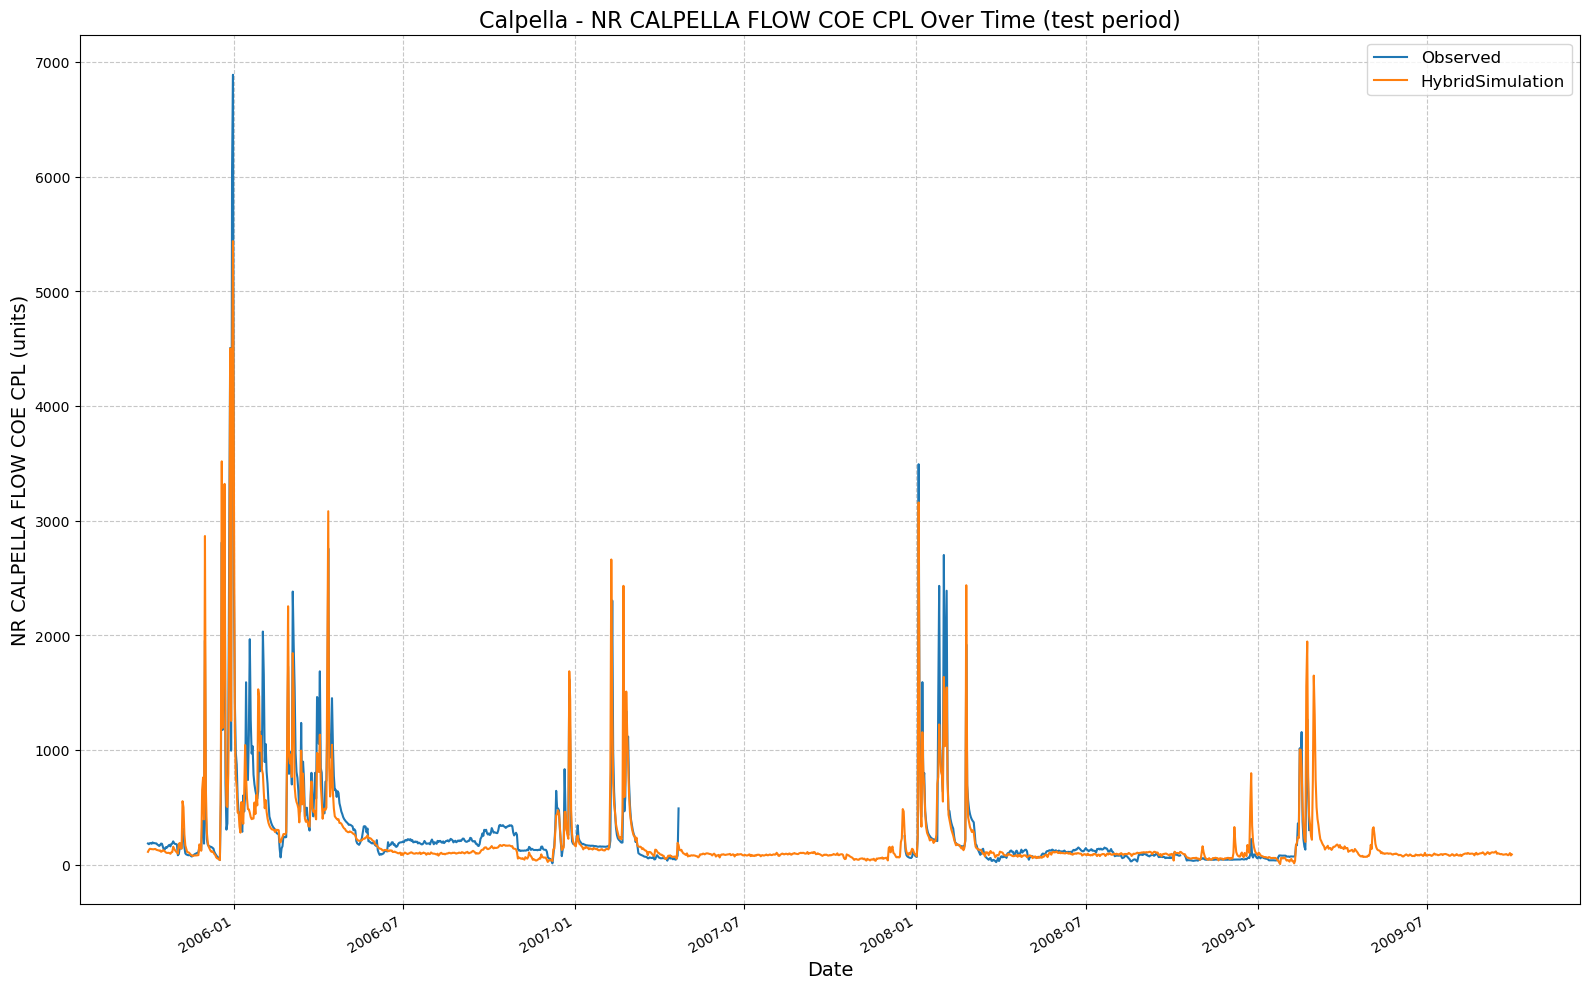

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2001_142638\results_output_test.csv


In [21]:
physics_informed_result_metrics, physics_informed_result_path = lstmPhysicsDailyExtended.results('test')

In [22]:
physics_informed_result_metrics

{'NSE': 0.8362835645675659,
 'MSE': 41695.265625,
 'RMSE': 204.19418607051475,
 'KGE': 0.8288891881461639,
 'Alpha-NSE': 0.9071987965631952,
 'Beta-KGE': 0.8825223445892334,
 'Beta-NSE': -0.06901245168380346,
 'Pearson-r': 0.9171395929701713,
 'FHV': -4.285842925310135,
 'FMS': -9.702462427703585,
 'FLV': -56.864041204198756,
 'Peak-Timing': 0.0,
 'Peak-MAPE': 20.011286735534668}

## Inspect results

In [24]:
    model1_df = pd.read_csv(lstm_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01,184.2500,150.53737
1,2005-10-02,178.0000,151.94781
2,2005-10-03,187.2500,155.99477
3,2005-10-04,188.0833,154.21475
4,2005-10-05,182.1250,157.91557


In [25]:
    model2_df = pd.read_csv(physics_informed_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01,184.2500,150.53737
1,2005-10-02,178.0000,151.94781
2,2005-10-03,187.2500,155.99477
3,2005-10-04,188.0833,154.21475
4,2005-10-05,182.1250,157.91557


In [26]:
    hms_df = clean_daily(pd.read_csv(path_to_physics_data))
    hms_df.head()

,Day,Time,Capella Gage FLOW,EF Russian 20 ET-POTENTIAL,EF Russian 20 FLOW,EF Russian 20 FLOW-BASE,EF Russian 20 INFILTRATION,EF Russian 20 PERC-SOIL,EF Russian 20 SATURATION FRACTION
date,,,,,,,,,
1994-10-02,1-Oct-94,24:00:00,481.916626,0.066151,385.320801,385.320801,0,0,0.696838
1994-10-03,2-Oct-94,24:00:00,422.200256,0.110752,325.200256,325.200256,0,0,0.687917
1994-10-04,3-Oct-94,24:00:00,401.010406,0.097419,301.072906,301.072906,0,0,0.677802
1994-10-05,4-Oct-94,24:00:00,350.536926,0.026083,271.099426,271.099426,0,0,0.671157
1994-10-06,5-Oct-94,24:00:00,325.131805,0.053415,237.319305,237.319305,0,0,0.670204


 ## Plot combined results

           date  Observed_Model1  Predicted_Model1  Observed_Model2  \
4018 2005-10-01         184.2500         150.53737         184.2500   
4019 2005-10-02         178.0000         151.94781         178.0000   
4020 2005-10-03         187.2500         155.99477         187.2500   
4021 2005-10-04         188.0833         154.21475         188.0833   
4022 2005-10-05         182.1250         157.91557         182.1250   

      Predicted_Model2  HMS_predicted  
4018         111.57333     514.779114  
4019         127.58107     454.221100  
4020         138.15506     431.052094  
4021         136.28680     401.099426  
4022         135.07599     366.340118  


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

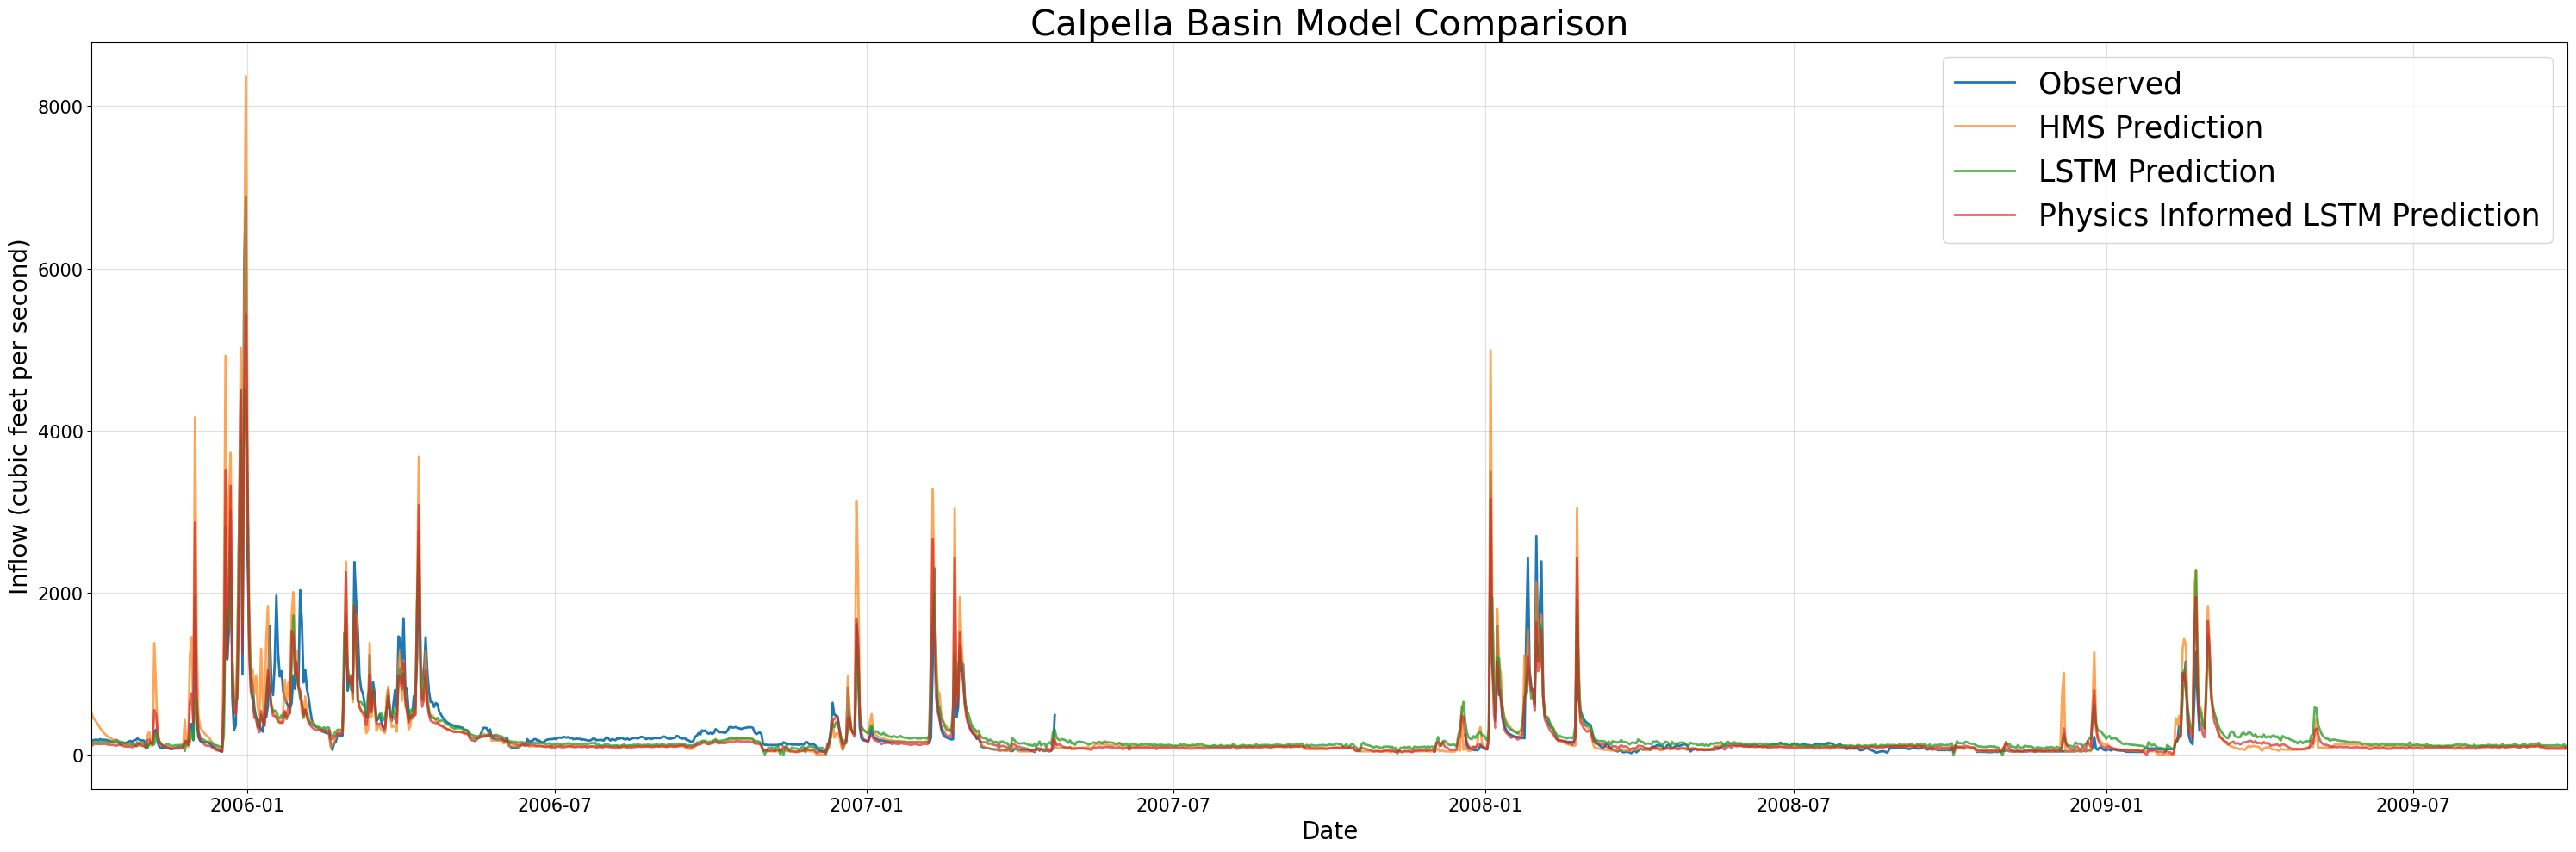

In [28]:
myplot, metrics_df = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Calpella Basin Model Comparison', fName = "calpella_metrics.csv")

In [29]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.699185,0.815490,0.836284
MSE,76611.391217,46990.947411,41695.261805
RMSE,276.787628,216.773955,204.194177
KGE,0.746423,0.766971,0.828890
Alpha-NSE,1.224704,0.784797,0.907199
Beta-KGE,1.058860,0.984264,0.882522
Beta-NSE,0.034578,-0.009244,-0.069012
Pearson-r,0.898291,0.912008,0.917140
FHV,25.593699,-20.244225,-4.285842
FMS,0.630349,-24.261616,-9.702451
